In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [2]:
data = pd.read_csv("Credit Card Customer Data.csv")
data.rename(columns={"Customer Key": "Customer_Key"}, inplace=True)
features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]
data = data.dropna(subset=features)
data = data[features].copy()
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [3]:
def random_centroids(data, k):
    return data.sample(k).reset_index(drop=True)

def get_labels(data, centroids):
    distances = np.linalg.norm(data.values[:, np.newaxis] - centroids.values, axis=2)
    return np.argmin(distances, axis=1)

def new_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return pd.DataFrame(centroids, columns=data.columns)

def plot_clusters(data, labels, centroids, iteration):
    #PCA for making data 2d
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(data_2d[:,0], data_2d[:,1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids_2d[:,0], centroids_2d[:,1], c='red', marker='X')
    plt.show()

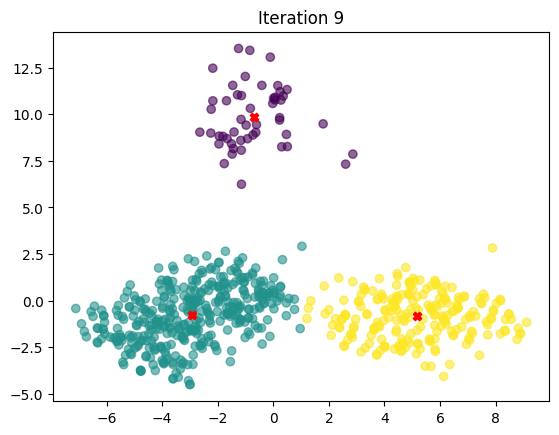

In [6]:
# K-Means clustering Algorithm
max_iterations = 200
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1 


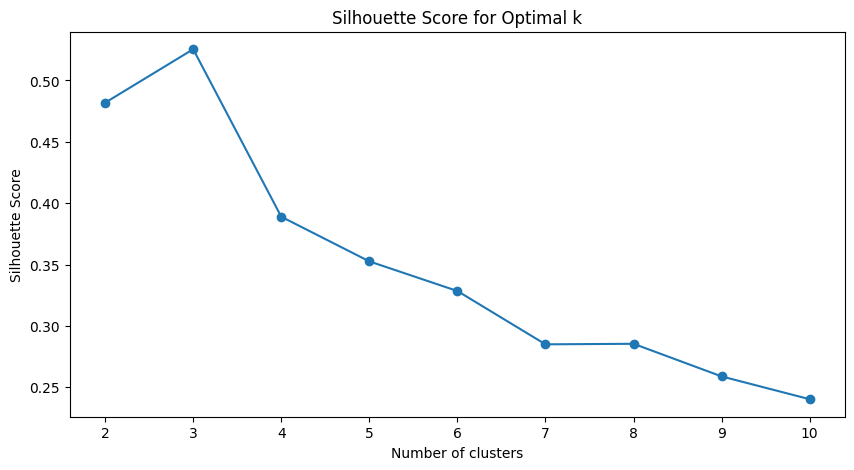

In [19]:
from sklearn.metrics import silhouette_score
max_clusters=10
def calculate_silhouette_score(data, max_cluster):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        centroids = random_centroids(data, k)
        old_centroids = pd.DataFrame()
        iteration = 1
        while iteration < max_iterations and not centroids.equals(old_centroids):
            old_centroids = centroids
            labels = get_labels(data, centroids)
            centroids = new_centroids(data, labels, k)
            iteration += 1
        silhouette_scores.append(silhouette_score(data, labels))
    return silhouette_scores

silhouette_scores = calculate_silhouette_score(data, max_clusters)

plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Conclusion: 
# 3 clusters have max accuracy